# Лаба 1
### Условия:
![Alt text](image.png)
### Методы решения СЛАУ:   
Прямые методы:   
Метод Гаусса с выбором главного элемента/LU-разложение (если возможно).   
Итерационные методы:   
Метод Зейделя, Метод Якоби, Метод верхней релаксации   

### Матрица:

In [247]:
import numpy as np
import matplotlib.pyplot as plt
matrix_with_b = np.array([[0.0] * 101] * 100)
matrix_without_b = np.array([[0.0] * 100] * 100)
b = [(float)(i + 1) for i in range(100)]
b = np.array(b)

for i in range(5):
    for j in range(i + 5):
        matrix_with_b[i][j] = 1

for i in range(5, 97):
    for j in range(i - 4, i + 5):
        matrix_with_b[i][j] = 1

for i in range(95, 100):
    for j in range(i - 4, 100):
        matrix_with_b[i][j] = 1

for i in range(100):
    matrix_with_b[i][100] = i + 1

for i in range(100):
    matrix_with_b[i][i] = 10


for i in range(5):
    for j in range(i + 5):
        matrix_without_b[i][j] = 1

for i in range(5, 97):
    for j in range(i - 4, i + 5):
        if(j < 100):
            matrix_without_b[i][j] = 1

for i in range(95, 100):
    for j in range(i - 4, 100):
        matrix_without_b[i][j] = 1

for i in range(100):
    matrix_without_b[i][i] = 10

print(matrix_with_b)
print(matrix_without_b)
print(b)

[[ 10.   1.   1. ...   0.   0.   1.]
 [  1.  10.   1. ...   0.   0.   2.]
 [  1.   1.  10. ...   0.   0.   3.]
 ...
 [  0.   0.   0. ...   1.   1.  98.]
 [  0.   0.   0. ...  10.   1.  99.]
 [  0.   0.   0. ...   1.  10. 100.]]
[[10.  1.  1. ...  0.  0.  0.]
 [ 1. 10.  1. ...  0.  0.  0.]
 [ 1.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  1.  1.]
 [ 0.  0.  0. ...  1. 10.  1.]
 [ 0.  0.  0. ...  1.  1. 10.]]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


### Метод Гаусса с выбором главного элемента:

In [248]:

def find_line_with_max_elem(x, num, n):
    max_elem = 0
    line = 0
    for i in range(n, len(x)):
        if max_elem < abs(x[i][num]):
            max_elem = abs(x[i][num])
            line = i
    return line

def scalar_multiply(A, i, x):
    sum = 0.0
    for j in range(len(A)):
        sum += A[i][j] * x[j]
    return sum

def nevyazka(A_b, x):
    y = np.array([0.0] * len(A_b))
    for i in range(len(A_b)):
        y[i] = scalar_multiply(A_b, i, x) - A_b[i][len(A_b)]
    return y

def Gauss_with_max_elem(A, n):
    x = np.array([0.0] * n)

    for i in range(n):
        swap_line = find_line_with_max_elem(A, i, i)
        A[[i, swap_line]] = A[[swap_line, i]]
        for j in range(i + 1, n): #прямой ход
            if(A[j][i] != 0):
                coeff = A[j][i] / A[i][i]
                A[j][i] = 0.0
                for k in range(i + 1, n + 1):
                    A[j][k] -= coeff * A[i][k]
    for i in range(n - 1, -1, -1):
            x[i] = (A[i][100] - scalar_multiply(A, i, x)) / A[i][i]
    return x

In [249]:

comp_matrix = matrix_with_b.copy()
x = Gauss_with_max_elem(comp_matrix, len(comp_matrix))
print("Решение:", x)
print("Невязка:", nevyazka(matrix_with_b, x))


Решение: [0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296 0.61130107 0.66677899
 0.722232   0.77774012 0.83330511 0.88888183 0.94445003 1.00000675
 1.05555813 1.11111052 1.16666527 1.22222144 1.27777775 1.3333336
 1.38888909 1.44444449 1.49999996 1.55555551 1.61111109 1.66666667
 1.72222223 1.77777778 1.83333333 1.88888889 1.94444444 2.
 2.05555556 2.11111111 2.16666667 2.22222222 2.27777778 2.33333333
 2.38888889 2.44444444 2.5        2.55555556 2.61111111 2.66666667
 2.72222222 2.77777778 2.83333333 2.88888889 2.94444444 3.
 3.05555555 3.11111111 3.16666667 3.22222222 3.27777778 3.33333334
 3.38888888 3.44444442 3.49999998 3.55555557 3.61111119 3.6666668
 3.72222225 3.77777748 3.8333327  3.88888846 3.94444536 4.00000287
 4.05555861 4.11110933 4.16665466 4.22220464 4.27777582 4.33337627
 4.38898044 4.44449555 4.4998623  4.55515455 4.61067178 4.66701868
 4.72390386 4.78014559 4.83372121 4.88185838 4.93252886 4.99368677
 5.0

### Метод LU разложения:

In [250]:


def LU_decomposition(A, A_b):
    x = np.array([0.0] * len(A))
    y = np.array([0.0] * len(A))
    l = np.array([[0.0] * len(A)] * len(A))
    u = np.array([[0.0] * len(A)] * len(A))
    
    for i in range(len(A)):
        l[i][i] = 1.0
    for i in range(len(A)):
        for j in range(len(A)):
            if(i <= j):
                sum = 0.0
                for k in range(i):
                    sum += l[i][k] * u[k][j]
                u[i][j] = A[i][j] - sum
            else:
                sum = 0.0
                for k in range(j):
                    sum += l[i][k] * u[k][j]
                l[i][j] = (A[i][j] - sum) / u[j][j]

    for i in range(0, len(A)):
            y[i] = (A_b[i][100] - scalar_multiply(l, i, y)) / l[i][i]
    
    for i in range(len(A) - 1, -1, -1):
            x[i] = (y[i] - scalar_multiply(u, i, x)) / u[i][i]
    
    return x

comp_matrix = matrix_without_b.copy()
x = LU_decomposition(comp_matrix, matrix_with_b)
print()
print("Решение: ", x)
print("Невязка:", nevyazka(matrix_with_b, x))


Решение:  [0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296 0.61130107 0.66677899
 0.722232   0.77774012 0.83330511 0.88888183 0.94445003 1.00000675
 1.05555813 1.11111052 1.16666527 1.22222144 1.27777775 1.3333336
 1.38888909 1.44444449 1.49999996 1.55555551 1.61111109 1.66666667
 1.72222223 1.77777778 1.83333333 1.88888889 1.94444444 2.
 2.05555556 2.11111111 2.16666667 2.22222222 2.27777778 2.33333333
 2.38888889 2.44444444 2.5        2.55555556 2.61111111 2.66666667
 2.72222222 2.77777778 2.83333333 2.88888889 2.94444444 3.
 3.05555555 3.11111111 3.16666667 3.22222222 3.27777778 3.33333334
 3.38888888 3.44444442 3.49999998 3.55555557 3.61111119 3.6666668
 3.72222225 3.77777748 3.8333327  3.88888846 3.94444536 4.00000287
 4.05555861 4.11110933 4.16665466 4.22220464 4.27777582 4.33337627
 4.38898044 4.44449555 4.4998623  4.55515455 4.61067178 4.66701868
 4.72390386 4.78014559 4.83372121 4.88185838 4.93252886 4.99368677
 5

## Итерационные методы:

### Метод Зейделя:


Решение:  [0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296 0.61130107 0.66677899
 0.722232   0.77774012 0.83330511 0.88888183 0.94445003 1.00000675
 1.05555813 1.11111052 1.16666527 1.22222144 1.27777775 1.3333336
 1.38888909 1.44444449 1.49999996 1.55555551 1.61111109 1.66666667
 1.72222223 1.77777778 1.83333333 1.88888889 1.94444444 2.
 2.05555556 2.11111111 2.16666667 2.22222222 2.27777778 2.33333333
 2.38888889 2.44444444 2.5        2.55555556 2.61111111 2.66666667
 2.72222222 2.77777778 2.83333333 2.88888889 2.94444444 3.
 3.05555555 3.11111111 3.16666667 3.22222222 3.27777778 3.33333334
 3.38888888 3.44444442 3.49999998 3.55555557 3.61111119 3.6666668
 3.72222225 3.77777748 3.8333327  3.88888846 3.94444536 4.00000287
 4.05555861 4.11110933 4.16665466 4.22220464 4.27777582 4.33337627
 4.38898044 4.44449555 4.4998623  4.55515455 4.61067178 4.66701868
 4.72390386 4.78014559 4.83372121 4.88185838 4.93252886 4.99368677
 5

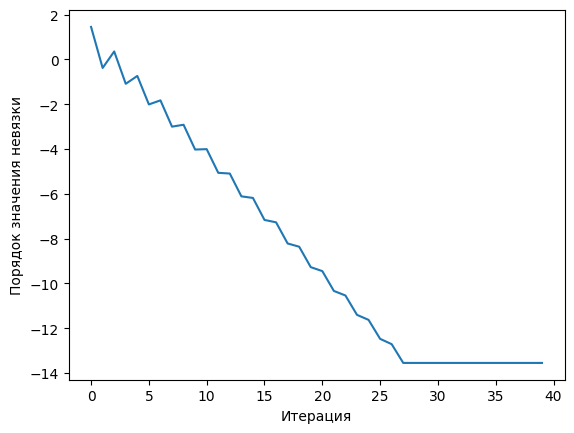

In [251]:
def zeidel(A, A_b, k):
    x = np.array([0.0] * len(A))
    nevyazka_arr = np.array([0.0] * k)
    
    for l in range(k):
        x_new = np.copy(x)
        for i in range(len(A)):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, len(A)))
            x_new[i] = (A_b[i][len(A)] - s1 - s2) / A[i][i]

        
        x = x_new
        nevyazka_arr[l] = max(nevyazka(A_b, x))
    return x, nevyazka_arr

comp_matrix = matrix_without_b.copy()
x, nevyazka_arr = zeidel(comp_matrix, matrix_with_b, 40)

x_axis = [0] * 40
for i in range(40):
    x_axis[i] = i

plt.plot(x_axis, np.log10(np.abs(nevyazka_arr)))
plt.xlabel("Итерация")
plt.ylabel("Порядок значения невязки")

print()
print("Решение: ", x)

### Метод Якоби:


Решение:  [0.02292139 0.09689605 0.16487571 0.22670602 0.28230826 0.33422808
 0.38818308 0.44352716 0.49957983 0.55564295 0.61130106 0.66677898
 0.72223199 0.77774011 0.83330509 0.88888182 0.94445001 1.00000674
 1.05555811 1.1111105  1.16666525 1.22222142 1.27777773 1.33333357
 1.38888906 1.44444446 1.49999993 1.55555548 1.61111107 1.66666664
 1.7222222  1.77777775 1.8333333  1.88888885 1.94444441 1.99999996
 2.05555552 2.11111107 2.16666663 2.22222218 2.27777774 2.33333329
 2.38888885 2.4444444  2.49999996 2.55555551 2.61111107 2.66666662
 2.72222218 2.77777773 2.83333329 2.88888884 2.9444444  2.99999995
 3.05555551 3.11111106 3.16666662 3.22222217 3.27777773 3.33333329
 3.38888883 3.44444437 3.49999993 3.55555552 3.61111114 3.66666675
 3.7222222  3.77777743 3.83333265 3.88888841 3.94444531 4.00000283
 4.05555857 4.11110928 4.16665462 4.2222046  4.27777577 4.33337623
 4.3889804  4.44449551 4.49986226 4.55515451 4.61067174 4.66701864
 4.72390383 4.78014556 4.83372118 4.88185835 4.9325

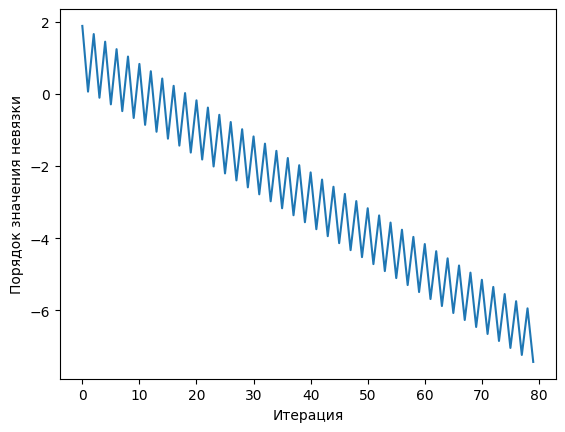

In [252]:
def Jakobi(A, b, A_b, k):
    x = np.array([0.0] * len(A))
    nevyazka_arr = np.array([0.0] * k)

    D = A.copy()
    for i in range(len(D)):
        for j in range(len(D)):
            if(i != j):
                D[i][j] = 0
    
    LU = A.copy()
    for i in range(len(D)):
        LU[i][i] = 0

    D_inv = np.linalg.inv(D)

    for i in range(k):
        x_new = np.matmul(D_inv, (b - np.matmul(LU, x)))
        x = x_new
        nevyazka_arr[i] = max(nevyazka(A_b, x))

    return x, nevyazka_arr




comp_matrix = matrix_without_b.copy()
x, nevyazka_arr = Jakobi(comp_matrix, b, matrix_with_b, 80)

x_axis = [0] * 80
for i in range(80):
    x_axis[i] = i

plt.plot(x_axis, np.log10(np.abs(nevyazka_arr)))
plt.xlabel("Итерация")
plt.ylabel("Порядок значения невязки")

print()
print("Решение: ", x)



### Метод верхней релаксации:


Решение:  [0.0229214  0.09689605 0.16487571 0.22670602 0.28230826 0.33422809
 0.38818309 0.44352717 0.49957984 0.55564296 0.61130107 0.66677899
 0.722232   0.77774012 0.83330511 0.88888183 0.94445003 1.00000675
 1.05555813 1.11111052 1.16666527 1.22222144 1.27777775 1.3333336
 1.38888909 1.44444449 1.49999996 1.55555551 1.61111109 1.66666667
 1.72222223 1.77777778 1.83333333 1.88888889 1.94444444 2.
 2.05555556 2.11111111 2.16666667 2.22222222 2.27777778 2.33333333
 2.38888889 2.44444444 2.5        2.55555556 2.61111111 2.66666667
 2.72222222 2.77777778 2.83333333 2.88888889 2.94444444 3.
 3.05555555 3.11111111 3.16666667 3.22222222 3.27777778 3.33333334
 3.38888888 3.44444442 3.49999998 3.55555557 3.61111119 3.6666668
 3.72222225 3.77777748 3.8333327  3.88888846 3.94444536 4.00000287
 4.05555861 4.11110933 4.16665466 4.22220464 4.27777582 4.33337627
 4.38898044 4.44449555 4.4998623  4.55515455 4.61067178 4.66701868
 4.72390386 4.78014559 4.83372121 4.88185838 4.93252886 4.99368677
 5

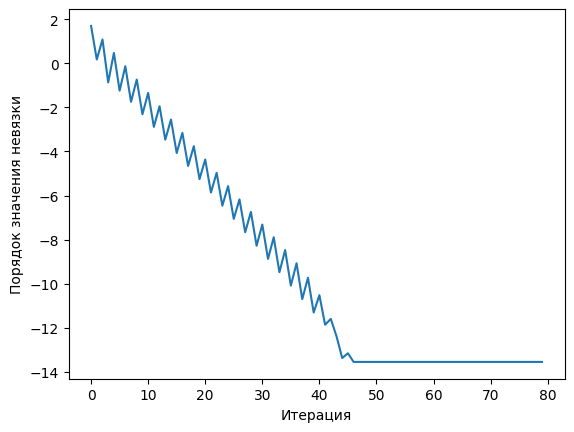

In [253]:
def Relaksacii(A, b, A_b, w, k):
    x = np.array([0.0] * len(A))
    nevyazka_arr = np.array([0.0] * k)

    for l in range(k):
        x_new = np.copy(x)
        for i in range(len(A)):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, len(A)))
            x_new[i] = (A_b[i][len(A)] - s1 - s2) / A[i][i]
            x_new[i] = x_new[i] + (w - 1) * (x_new[i] - x[i])

        x = x_new
        nevyazka_arr[l] = max(nevyazka(A_b, x))
    
    return x, nevyazka_arr

comp_matrix = matrix_without_b.copy()
x, nevyazka_arr = Relaksacii(comp_matrix, b, matrix_with_b, 1.25, 80)

x_axis = [0] * 80
for i in range(80):
    x_axis[i] = i

plt.plot(x_axis, np.log10(np.abs(nevyazka_arr)))
plt.xlabel("Итерация")
plt.ylabel("Порядок значения невязки")

print()
print("Решение: ", x)